In [2]:
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 68.1141	valid_0's l1: 5.55276
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 59.83	valid_0's l1: 5.19666
[3]	valid_0's l2: 52.3994	valid_0's l1: 4.82939
[4]	valid_0's l2: 46.5764	valid_0's l1: 4.52715
[5]	valid_0's l2: 41.7525	valid_0's l1: 4.27786
[6]	valid_0's l2: 37.2204	valid_0's l1: 4.00873
[7]	valid_0's l2: 33.7469	valid_0's l1: 3.76633
[8]	valid_0's l2: 30.9216	valid_0's l1: 3.58434
[9]	valid_0's l2: 28.2814	valid_0's l1: 3.4148
[10]	valid_0's l2: 26.3029	valid_0's l1: 3.29242
[11]	valid_0's l2: 24.4568	valid_0's l1: 3.14921
[12]	valid_0's l2: 22.6915	valid_0's l1: 3.03033
[13]	valid_0's l2: 21.0373	valid_0's l1: 2.91829
[14]	valid_0's l2: 19.6663	valid_0's l1: 2.80696
[15]	valid_0's l2: 18.3347	valid_0's l1: 2.71231
[16]	valid_0's l2: 17.3153	valid_0's l1: 2.64309
[17]	valid_0's l2: 16.5847	valid_0's l1: 2.57932
[18]	valid_0's l2: 15.9696	valid_0's l1: 2.5279
[19]	valid_0's l

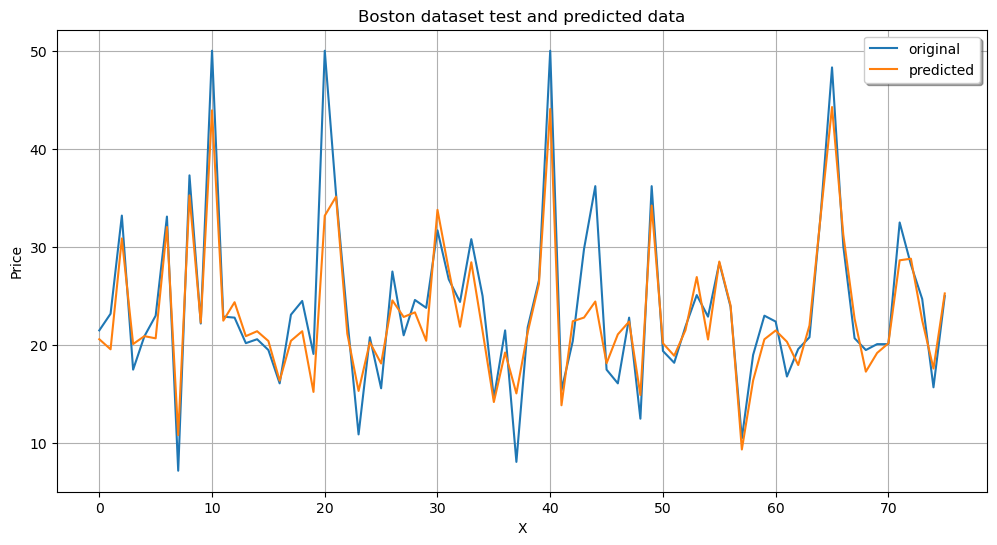

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

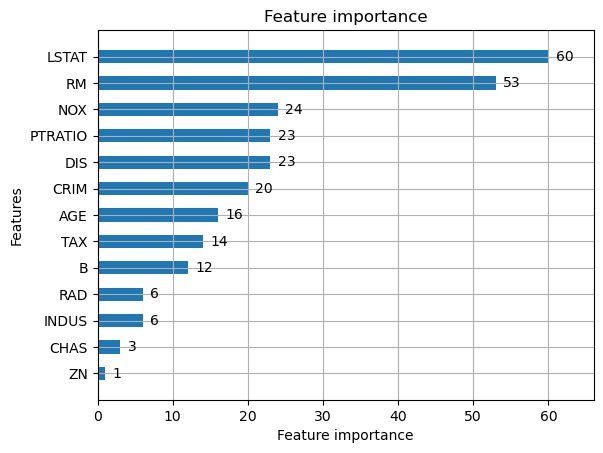

In [3]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas import DataFrame

boston = load_boston()
x, y = boston.data, boston.target

x_df = DataFrame(x, columns= boston.feature_names)
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.15)

# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

# laoding data
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5) 